## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [12]:
df = pd.DataFrame(data['data'], columns  = data['feature_names'])
df['target'] = data['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:>

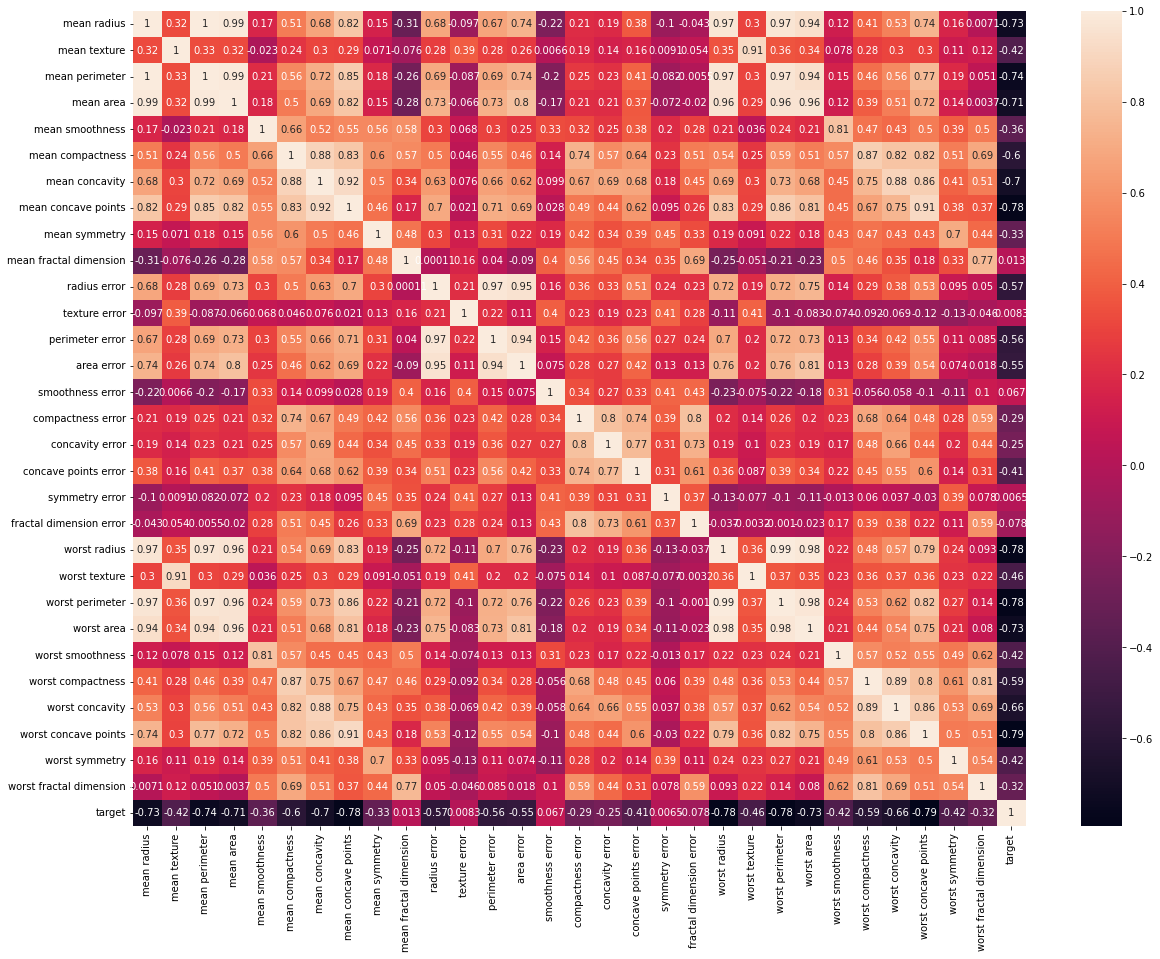

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [19]:
X = df.drop(columns='target')
y = df['target']

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10, stratify=y) # shuffle para desordenar los datos y strtify para conservar los mismos balances de la target

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [34]:
y_train.value_counts(normalize=True)

1    0.626374
0    0.373626
Name: target, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

1    0.631579
0    0.368421
Name: target, dtype: float64

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [41]:
np.arange(5,21,5)

array([ 5, 10, 15, 20])

In [45]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,3,5],
    'classifier__max_depth': [1,3,5]
}

svm_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [SVC()],
    'classifier__C': [0.1, 0.5, 1, 10, 100],
}

knn_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3,9,15],
}


gb_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [1,3,5],
}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param,
    knn_param,
    gb_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3,
                  scoring="accuracy")


In [46]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            solver='liblinear')],
                          'classifier__penalty': ['l1', 'l2'],
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'classifier': [RandomForestClassifier()],
                          'classifier_...
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 0.5, 1, 10, 100],
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'classifier': [KNeighborsClassifier(

In [47]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=20)),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [48]:
clf.best_score_

0.9758626699198327

In [49]:
clf.best_params_

{'classifier': LogisticRegression(max_iter=1000, solver='liblinear'),
 'classifier__penalty': 'l2',
 'selectkbest__k': 20}

In [54]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9736842105263158

In [56]:
confusion_matrix(y_test, y_pred)

array([[41,  1],
       [ 2, 70]], dtype=int64)

In [58]:
clf.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=20)),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [59]:
y_pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9736842105263158


array([[41,  1],
       [ 2, 70]], dtype=int64)

In [70]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'selectkbest__k': np.arange(5,25,2),
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'selectkbest__k': np.arange(5,25,2),
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,3,5],
    'classifier__max_depth': [1,3,5]
}

svm_param = {
    'selectkbest__k': np.arange(5,25,2),
    'classifier': [SVC()],
    'classifier__C': [0.1, 0.5, 1, 10, 100],
}

knn_param = {
    'selectkbest__k': np.arange(5,25,2),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3,9,15],
}


gb_param = {
    'selectkbest__k': np.arange(5,25,2),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [1,3,5],
}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param,
    knn_param,
    gb_param
]

clf_randomcv = RandomizedSearchCV(estimator = pipe,
                  param_distributions  = search_space,
                  cv = 3,
                  scoring="accuracy")


In [71]:
clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('selectkbest', SelectKBest()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions=[{'classifier': [LogisticRegression(max_iter=1000,
                                                                           solver='liblinear')],
                                         'classifier__penalty': ['l1', 'l2'],
                                         'selectkbest__k': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
                                        {'classifier': [RandomF...
                                         'classifier__C': [0.1, 0.5, 1, 10,
                                                           100],
                                         'selectkbest__k': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [72]:
clf_randomcv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=21)),
                ('classifier', SVC(C=0.5))])

In [73]:
clf_randomcv.best_params_

{'selectkbest__k': 21, 'classifier__C': 0.5, 'classifier': SVC(C=0.5)}

In [74]:
clf_randomcv.best_score_

0.9648396653886371